In [1]:
from galpy.potential import MWPotential2014, KeplerPotential, evaluateDensities, evaluateRforces, evaluateR2derivs
from galpy.potential.mwpotentials import DehnenBinney98I, Irrgang13I
from galpy.orbit import Orbit
from galpy.util import bovy_conversion
from galpy.util.bovy_conversion import get_physical
from astropy import units
from astropy.units import imperial
imperial.enable()
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G, parsec, giga, year
G *= (bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0)*1000.0*parsec)**(-3.0) * (bovy_conversion.mass_in_msol(220.0, 8.0)*(2.0*10.0**30.0)) * (bovy_conversion.time_in_Gyr(220.0,8.0)*giga*year)**(2.0)

/home/ppxest/anaconda3/lib/python3.7/site-packages/astropy/extern/six.py:15: AstropyDeprecationWarning: astropy.extern.six will be removed in 4.0, use the six module directly if it is still needed
  AstropyDeprecationWarning)



In [2]:
#Add black hole at the centre of the Galaxy
#MWPotential2014.append(KeplerPotential(amp=4*10**6./bovy_conversion.mass_in_msol(220.,8.)))

In [3]:
#Function to calculate Jacobi radius
def jacobiRadius(potential, R, z, phi, t, M_b):
    dPhidR = -evaluateRforces(potential, R, z, phi, t)
    d2PhidR2 = evaluateR2derivs(potential, R, z, phi, t)
    return (G*M_b/R *(dPhidR/(R**2.0) - d2PhidR2/R)**(-1.0))**(1.0/3.0)

In [4]:
#o = Orbit(vxvv=[1.,0.1,1.1,0.,0.1,0.])
#o = Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))
#o = Orbit(**get_physical(DehnenBinney98I))
#o.turn_physical_off()
#o.flip(inplace = True)

In [5]:
#Integration time
ts = np.linspace(0.,-16.0,3001)*units.Gyr
N_t = np.size(ts)

In [6]:
#Integrate orbit
#o.integrate(ts, MWPotential2014)
#o.integrate(ts, DehnenBinney98I)

In [7]:
#Find time corresponding to minimum R
#R_min = o.R(ts[0])
#t_min = ts[0]
#for t in ts:
#    if (o.R(t) < R_min):
#        R_min = o.R(t)
#        t_min = t
#Calculate Jacobi radius
#r_J = jacobiRadius(DehnenBinney98I, o.R(t_min), o.z(t_min), o.phi(t_min), t_min, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
#r_J = jacobiRadius(DehnenBinney98I, o.R(), o.z(), o.phi(), 0, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
#print('Jacobi radius, pc =', r_J*1000.0*bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0))

In [8]:
#Evaluate average dark matter density and stellar density
#avg_dm_density = 0.0
#avg_stellar_density = 0.0
#for i in range(N_t):
#    avg_dm_density += evaluateDensities(MWPotential2014[2], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T
#    avg_stellar_density += evaluateDensities(MWPotential2014[0], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T + evaluateDensities(MWPotential2014[1], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T
#print('Average dark matter density =', avg_dm_density*bovy_conversion.dens_in_msolpc3(220.0, 8.0))
#print('Average stellar density =', avg_stellar_density*bovy_conversion.dens_in_msolpc3(220.0, 8.0))

In [9]:
#o.plot(vo=220.0, ro=8.0)
#o.plot(**get_physical(DehnenBinney98I))

In [10]:
#orbits = [Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#labels = ['NLTT 10536', 'NLTT 16394', 'NLTT 39456']
#overp = [False, True, True]
#xplots = ['R', 'R', 'R']

#orbits = [Orbit([227.55005147436, -16.39466183454, 0.0294229, -997.999, -3542.377, 310.88], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#labels = ['NLTT 39456 manual', 'NLTT 39456 auto']

#orbits = [Orbit([049.62122952700, -07.14196049755, 0.225927, 169.224, -355.297, 152.28], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I))]

#Quinn binaries
#orbits = [Orbit([49.62049, -7.14044, 0.219, 171, -353, 121.6], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I)), Orbit([85.91593, 49.38367, 0.210, 81, -176, 262.3], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.348, 328, -172, 268.2], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]

#Allen and Santillan binaries
initial_conditions = [[8.499*units.kpc, 68.2*units.km/units.s, 131.8*units.km/units.s, -0.004*units.kpc, -29.4*units.km/units.s, 0.0*units.deg],
                     [8.504*units.kpc, -103.7*units.km/units.s, 219.4*units.km/units.s, -0.003*units.kpc, -33.8*units.km/units.s, 0.0*units.deg],
                     [8.501*units.kpc, -28.2*units.km/units.s, -57.1*units.km/units.s, -0.002*units.kpc, -46.4*units.km/units.s, 0.0*units.deg],
                     [8.501*units.kpc, -54.7*units.km/units.s, 178.1*units.km/units.s, 0.002*units.kpc, -67.6*units.km/units.s, 0.0*units.deg],
                     [8.502*units.kpc, -79.9*units.km/units.s, 171.1*units.km/units.s, 0.003*units.kpc, -71.4*units.km/units.s, 0.0*units.deg],
                     [8.498*units.kpc, 129.4*units.km/units.s, 236.5*units.km/units.s, 0.000*units.kpc, 24.6*units.km/units.s, 0.0*units.deg],
                     [8.499*units.kpc, 81.4*units.km/units.s, 177.5*units.km/units.s, 0.000*units.kpc, -2.2*units.km/units.s, 0.0*units.deg],
                     [8.498*units.kpc, 68.4*units.km/units.s, 193.0*units.km/units.s, -0.003*units.kpc, 9.8*units.km/units.s, 0.0*units.deg],
                     [8.499*units.kpc, 92.7*units.km/units.s, 216.3*units.km/units.s, -0.003*units.kpc, -50.9*units.km/units.s, 0.0*units.deg],
                     [8.501*units.kpc, -42.5*units.km/units.s, 153.5*units.km/units.s, -0.001*units.kpc, 7.3*units.km/units.s, 0.0*units.deg],
                     [8.474*units.kpc, -313.6*units.km/units.s, -340.6*units.km/units.s, 0.019*units.kpc, -98.4*units.km/units.s, 0.0*units.deg],
                     [8.474*units.kpc, -321.8*units.km/units.s, -342.4*units.km/units.s, 0.019*units.kpc, -93.1*units.km/units.s, 0.0*units.deg]]
orbits = [Orbit(ics, **get_physical(Irrgang13I)) for ics in initial_conditions]
labels = ['GL1', 'GL166', 'GL191', 'GL411', 'GL445', 'GL699', 'GL820', 'GL845', 'GL887', 'GL905', 'LDS519A', 'LDS519B']


#Alter initial conditions
#orbits = [Orbit([49.62049, -7.14044, 0.219, 171, -353*1.1, 121.6], radec=True, **get_physical(DehnenBinney98I)), Orbit([85.91593, 49.38367, 0.210, 81, -176*1.1, 262.3], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.348, 328, -172*1.1, 268.2], radec=True, **get_physical(DehnenBinney98I))]

for orbi in orbits:
    orbi.turn_physical_off()
    #orbi.integrate(ts, DehnenBinney98I)
    orbi.integrate(ts, Irrgang13I)

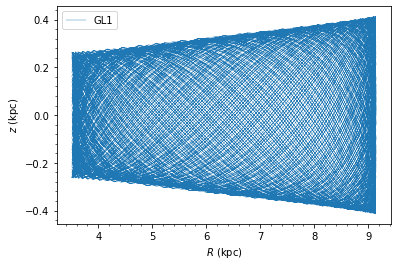

Orbital parameters:
/home/ppxest/anaconda3/lib/python3.7/site-packages/galpy/potential/SCFPotential.py:292: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  func[j] = nu.sum(self._compute(funcTilde, R[j][0],z[j][0],phi[j][0]))

Energy, 100km^2 s^-2 = -1587.932140599761
Total angular Momentum, 10km kpc s^-1 = 114.76393754119454
Pericenter distance, kpc = 3.511488642103997
Apocentre distance, kpc = 9.148780691342061
Maximum z, kpc = 0.41423117911136215
Eccentricity = 0.44527425924070957


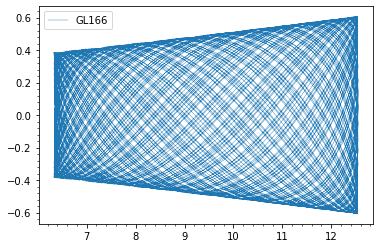

Orbital parameters:
Energy, 100km^2 s^-2 = -1401.9195156499325
Total angular Momentum, 10km kpc s^-1 = 188.78359089318886
Pericenter distance, kpc = 6.334456069066575
Apocentre distance, kpc = 12.552939625919768
Maximum z, kpc = 0.6079041981585518
Eccentricity = 0.3292398622486577


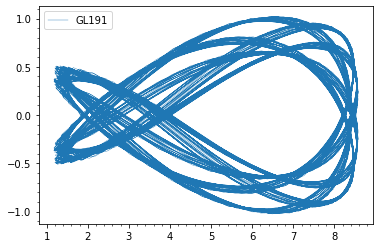

Orbital parameters:
Energy, 100km^2 s^-2 = -1671.2098953493114
Total angular Momentum, 10km kpc s^-1 = 62.55018185264451
Pericenter distance, kpc = 1.224948406134316
Apocentre distance, kpc = 8.579691043632367
Maximum z, kpc = 1.0248197048875698
Eccentricity = 0.7501288216848268


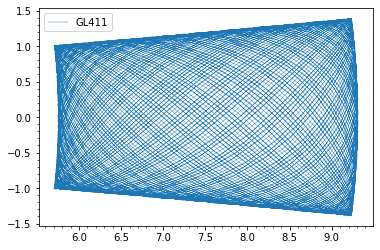

Orbital parameters:
Energy, 100km^2 s^-2 = -1505.8456453493116
Total angular Momentum, 10km kpc s^-1 = 161.93820857522448
Pericenter distance, kpc = 5.749135062356574
Apocentre distance, kpc = 9.341694323317983
Maximum z, kpc = 1.392210076507858
Eccentricity = 0.2380624132144624


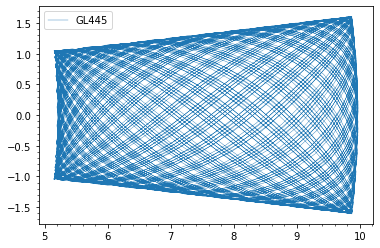

Orbital parameters:
Energy, 100km^2 s^-2 = -1498.4099095715274
Total angular Momentum, 10km kpc s^-1 = 157.6178816755047
Pericenter distance, kpc = 5.195552268051647
Apocentre distance, kpc = 10.006036725553109
Maximum z, kpc = 1.609695815689964
Eccentricity = 0.3164461596432592


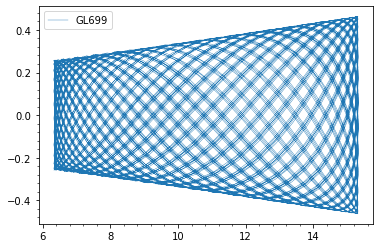

Orbital parameters:
Energy, 100km^2 s^-2 = -1336.0150951680005
Total angular Momentum, 10km kpc s^-1 = 202.0620158938745
Pericenter distance, kpc = 6.332518481961512
Apocentre distance, kpc = 15.324654127970257
Maximum z, kpc = 0.4644320645766643
Eccentricity = 0.41520358210956126


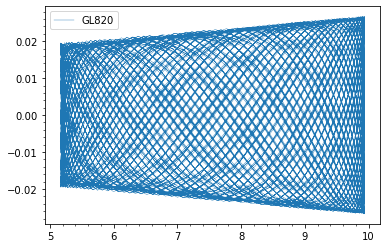

Orbital parameters:
Energy, 100km^2 s^-2 = -1511.6817428220968
Total angular Momentum, 10km kpc s^-1 = 150.86883692403444
Pericenter distance, kpc = 5.160229302872737
Apocentre distance, kpc = 9.934501232353417
Maximum z, kpc = 0.026757355200063008
Eccentricity = 0.31628732413202704


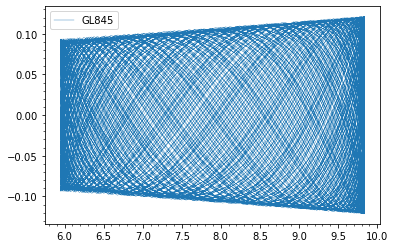

Orbital parameters:
Energy, 100km^2 s^-2 = -1492.3055781928153
Total angular Momentum, 10km kpc s^-1 = 164.223753265
Pericenter distance, kpc = 5.94379169579191
Apocentre distance, kpc = 9.839085069655056
Maximum z, kpc = 0.12157867713549138
Eccentricity = 0.24680503001778534


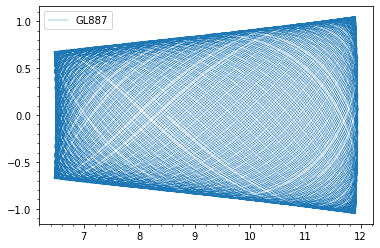

Orbital parameters:
Energy, 100km^2 s^-2 = -1412.5176759372061
Total angular Momentum, 10km kpc s^-1 = 188.84842230391817
Pericenter distance, kpc = 6.481221939662703
Apocentre distance, kpc = 11.96103442915023
Maximum z, kpc = 1.0551498338850922
Eccentricity = 0.2971335166316335


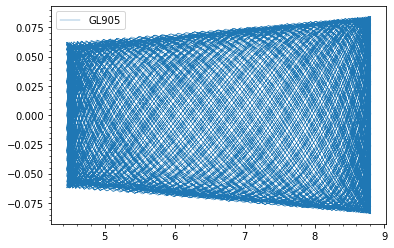

Orbital parameters:
Energy, 100km^2 s^-2 = -1575.1441175859768
Total angular Momentum, 10km kpc s^-1 = 130.63762870220586
Pericenter distance, kpc = 4.453340087280672
Apocentre distance, kpc = 8.806279148328732
Maximum z, kpc = 0.08445511653386775
Eccentricity = 0.328285374089628


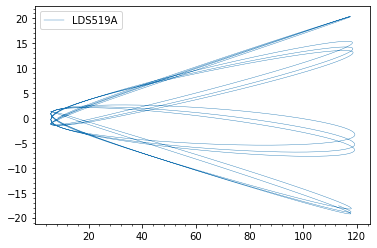

Orbital parameters:
Energy, 100km^2 s^-2 = -583.5986377920364
Total angular Momentum, 10km kpc s^-1 = 300.2638707602292
Pericenter distance, kpc = 5.854343630835497
Apocentre distance, kpc = 119.3189264224618
Maximum z, kpc = 20.444963059357992
Eccentricity = 0.9064601631267956


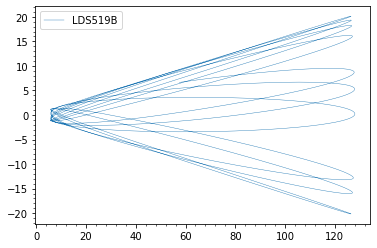

Orbital parameters:
Energy, 100km^2 s^-2 = -556.4749877920366
Total angular Momentum, 10km kpc s^-1 = 300.5250452622569
Pericenter distance, kpc = 5.80531162553488
Apocentre distance, kpc = 128.13586795947833
Maximum z, kpc = 20.14732589069807
Eccentricity = 0.9133155069483285


In [11]:
#labels = ['NLTT 10536 Quinn', 'NLTT 10536 SIMBAD', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn', 'NLTT 16394 SIMBAD', 'NLTT 39456 SIMBAD']
#labels = ['NLTT 10536 Quinn', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn']
#overp = [False, True, True, True, True, True]
#xplots = ['R', 'R', '-R', 'R', 'R', 'R']
overp = [True]*len(orbits)
overp[0] = False

#print([orbits[4].ra(**get_physical(DehnenBinney98I)), orbits[4].dec(**get_physical(DehnenBinney98I)), orbits[4].dist(**get_physical(DehnenBinney98I)), orbits[4].pmra(**get_physical(DehnenBinney98I)), orbits[4].pmdec(**get_physical(DehnenBinney98I)), orbits[5].vlos(**get_physical(DehnenBinney98I))])

for orbi,label,over in zip(orbits,labels,overp):
    #if (label=='NLTT 10536 Quinn'):
    #orbi.plot(d1=xplot, d2='z', **get_physical(DehnenBinney98I), overplot=over, label=label, lw=0.4)
    orbi.plot(d1='R', d2='z', **get_physical(Irrgang13I), overplot=over, label=label, lw=0.4)
    plt.legend()
    plt.show()
    orbi.turn_physical_on(**get_physical(Irrgang13I))
    print('Orbital parameters:')
    print('Energy, 100km^2 s^-2 =', orbi.E()/100.0)
    print('Total angular Momentum, 10km kpc s^-1 =', np.sqrt(orbi.L()[0]**2.0 + orbi.L()[1]**2.0 + orbi.L()[2]**2.0)/10.0)
    print('Pericenter distance, kpc =', orbi.rperi())
    print('Apocentre distance, kpc =', orbi.rap())
    print('Maximum z, kpc =', orbi.zmax())
    print('Eccentricity =', orbi.e())
#plt.axis([-40, 80, -50, 40])